In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
sns.set_style('whitegrid', {'xtick.color': 'black',
 'ytick.color': 'black',})
sns.set_palette('viridis')
plt.rcParams.update({'font.size' : 10, 'figure.figsize' : (17,5)})
a4_dims = (11.7, 8.27)

## Загрузка и подготовка данных

In [4]:
ru = pd.read_csv('ru_domains.txt', delimiter=';', names=['name', 'registrator', 'creation_date', 'payed_due', 'delegated'])
rf = pd.read_csv('rf_domains.txt', delimiter=';', names=['name', 'registrator', 'creation_date', 'payed_due', 'delegated'])
su = pd.read_csv('su_domains.txt', delimiter=';', names=['name', 'registrator', 'creation_date', 'payed_due', 'delegated'])

domains = pd.concat([ru, rf, su], ignore_index=True)
domains['zone'] = domains['registrator'].str[-2:]
domains['registrator'] = domains['registrator'].str[:-3]
domains['creation_year'] = domains['creation_date'].str[:4]
domains['payed_due_year'] = domains['payed_due'].str[:4]

length = []
for i in range(domains.shape[0]):
    length.append(len(domains['name'][i]) - 2)

domains['name length'] = length
domains['creation_year'] = pd.to_numeric(domains['creation_year'])
domains['creation_date'] = pd.to_datetime(domains['creation_date'])
domains['age_days'] = (pd.to_datetime(dt.date.today()) - domains['creation_date']).dt.days

good = pd.read_csv('topics.csv')
good.loc[good.topic == 'казино, игровые автоматы', ['topic']] = 'онлайн казино'
good.loc[good.topic == 'не русско/англоязычные сайты', ['topic']] = 'иностранные сайты'
good.loc[good.topic == 'развлечения (игры, создание сайтов)', ['topic']] = 'развлечения'
good.loc[good.topic == 'досуг', ['topic']] = 'развлечения'
good.loc[good.topic == 'дизайн интерьера / пластиковые окна / натяжные потолки', ['topic']] = 'интерьерные услуги (замер, установка и тд)'
good.loc[good.topic == 'медицинские услуги', ['topic']] = 'красота и здоровье'
good.loc[good.topic == 'покупка всякого', ['topic']] = 'интернет торговля'
good.loc[good.topic == 'доставка еды / рецепты', ['topic']] = 'покупка продуктов питания'
good.rename(columns={'url' : 'name'}, inplace=True)

df = domains.merge(good, how='left', on='name')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop_duplicates(subset='name', inplace=True)
df['topic'].fillna('неинтерпретируемое', inplace=True)
df

,name,registrator,creation_date,payed_due,delegated,zone,creation_year,payed_due_year,name length,age_days,topic
0,0--0------------------------------------------...,REGRU,2015-11-18,2024-11-18,DELEGATED,RU,2015,2024,64,3136,неинтерпретируемое
1,0--0------------------------------------------...,AXELNAME,2022-02-15,2025-02-15,DELEGATED,RU,2022,2025,64,855,развлечения
2,0--0------------------------------------------...,AXELNAME,2022-06-10,2024-06-10,DELEGATED,RU,2022,2024,64,740,неинтерпретируемое
3,0--0------------------------------------------...,AXELNAME,2017-03-24,2024-03-24,DELEGATED,RU,2017,2024,64,2644,неинтерпретируемое
4,0--0--------DRA-DOT-RU-PREMIUM-DOMAINS-AND-SER...,REGRU,2011-03-24,2024-03-24,DELEGATED,RU,2011,2024,64,4836,неинтерпретируемое
...,...,...,...,...,...,...,...,...,...,...,...
6339057,ZZZTTT48.SU,ARDIS,2023-01-03,2024-01-03,DELEGATED,SU,2023,2024,9,533,неинтерпретируемое
6339058,ZZZTTT668.SU,REGRU,2021-05-01,2024-05-01,DELEGATED,SU,2021,2024,10,1145,неинтерпретируемое
6339059,ZZZTTT69.SU,ARDIS,2022-02-18,2024-02-18,DELEGATED,SU,2022,2024,9,852,неинтерпретируемое
6339060,ZZZTTT7.SU,ARDIS,2022-09-25,2024-09-25,DELEGATED,SU,2022,2024,8,633,неинтерпретируемое


## Анализ тем

**Соотношение количаства сайтов с интерпретируемыми и неинтерпретируемыми темами**

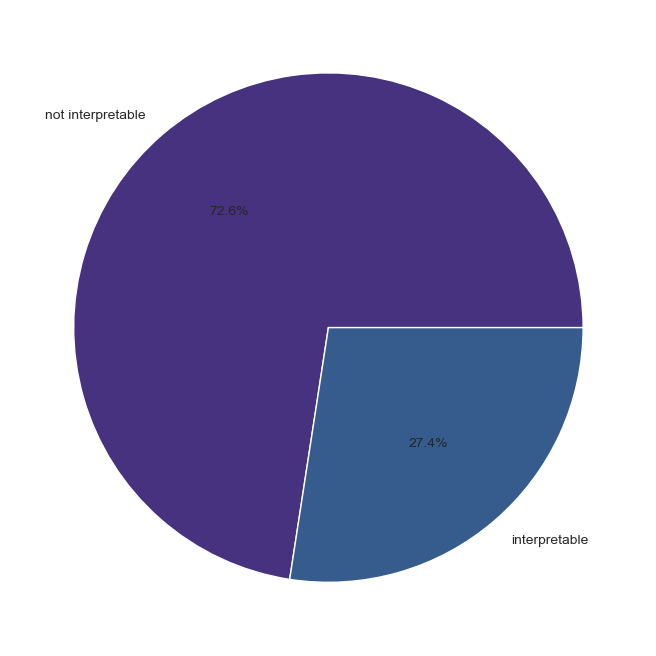

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie([len(df['topic'][df['topic'] == 'неинтерпретируемое']),
         len(df['topic'][df['topic'] != 'неинтерпретируемое'])],
         labels=['not interpretable', 'interpretable'],
         autopct='%1.1f%%');

c:\Users\Анна\.conda\envs\ml-2\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


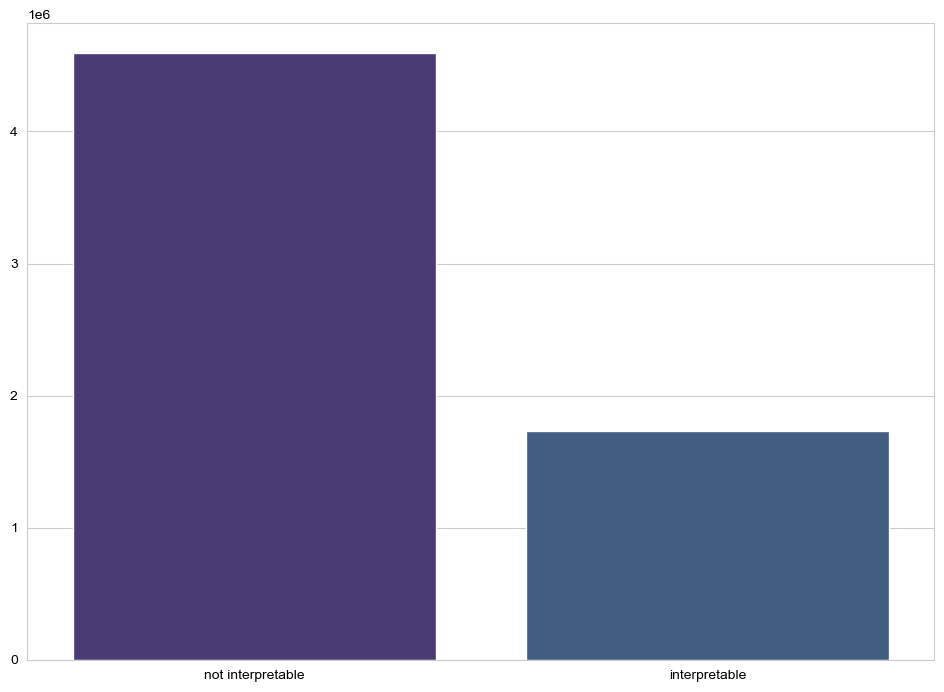

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y=[len(df['topic'][df['topic'] == 'неинтерпретируемое']),
               len(df['topic'][df['topic'] != 'неинтерпретируемое'])],
               x=['not interpretable', 'interpretable']);

**Распределение всех тем**

In [ ]:
a = pd.concat([df['topic'].value_counts(),
               round(df['topic'].value_counts() * 100 / len(df), 2)],
               axis=1)
a.reset_index(inplace=True)
a.columns = ['topic', 'count', 'share (%)']
a

,topic,count,share (%)
0,неинтерпретируемое,4590373,72.57
1,интернет торговля,305261,4.83
2,развлечения,139014,2.20
3,иностранные сайты,108502,1.72
4,онлайн казино,107071,1.69
5,"интерьерные услуги (замер, установка и тд)",102775,1.62
6,"знакомства, кино",94703,1.50
7,"юридические, бухгалтерские услуги, экспертиза ...",90166,1.43
8,покупка техники/бытовых предметов,78182,1.24
9,"строительство, ремонт домов",78040,1.23


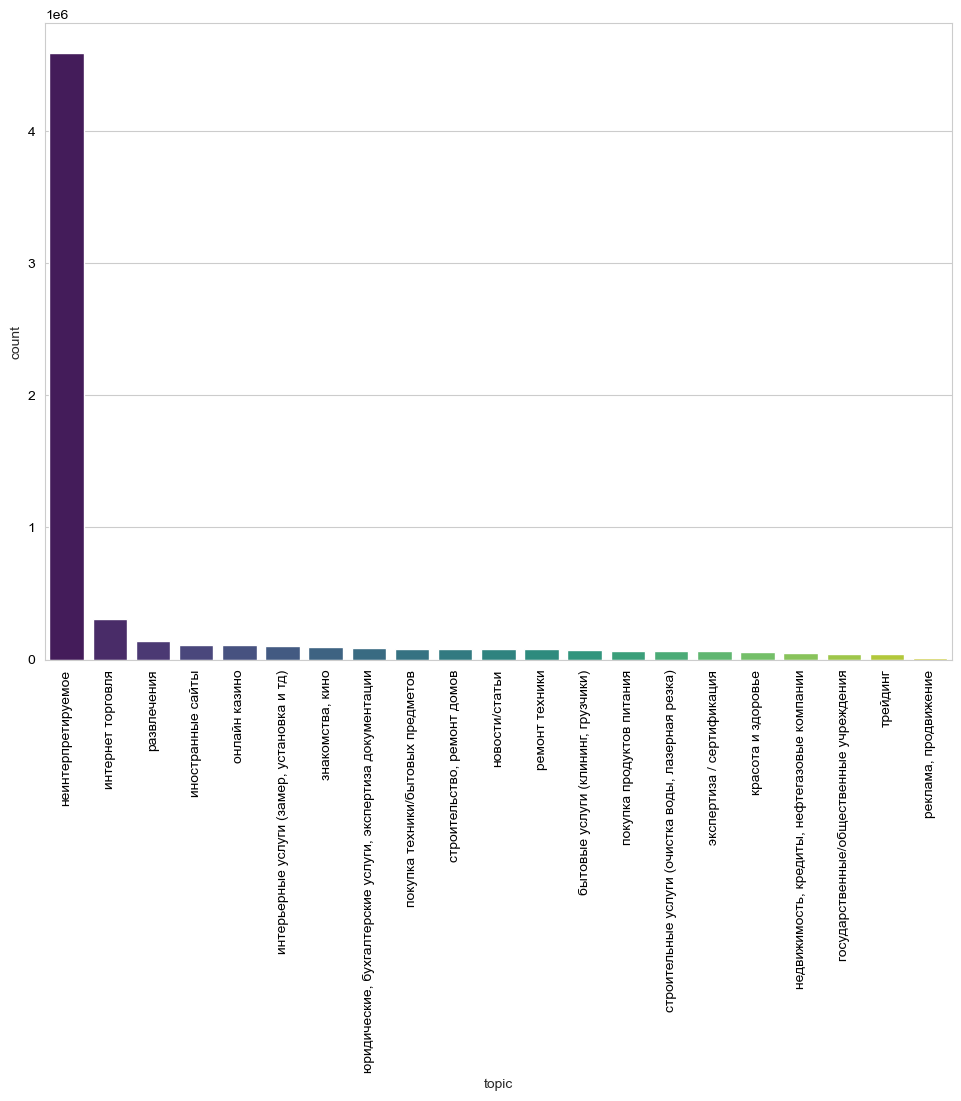

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x=df['topic'], palette='viridis', order=df['topic'].value_counts().index)
plt.xticks(rotation=90);

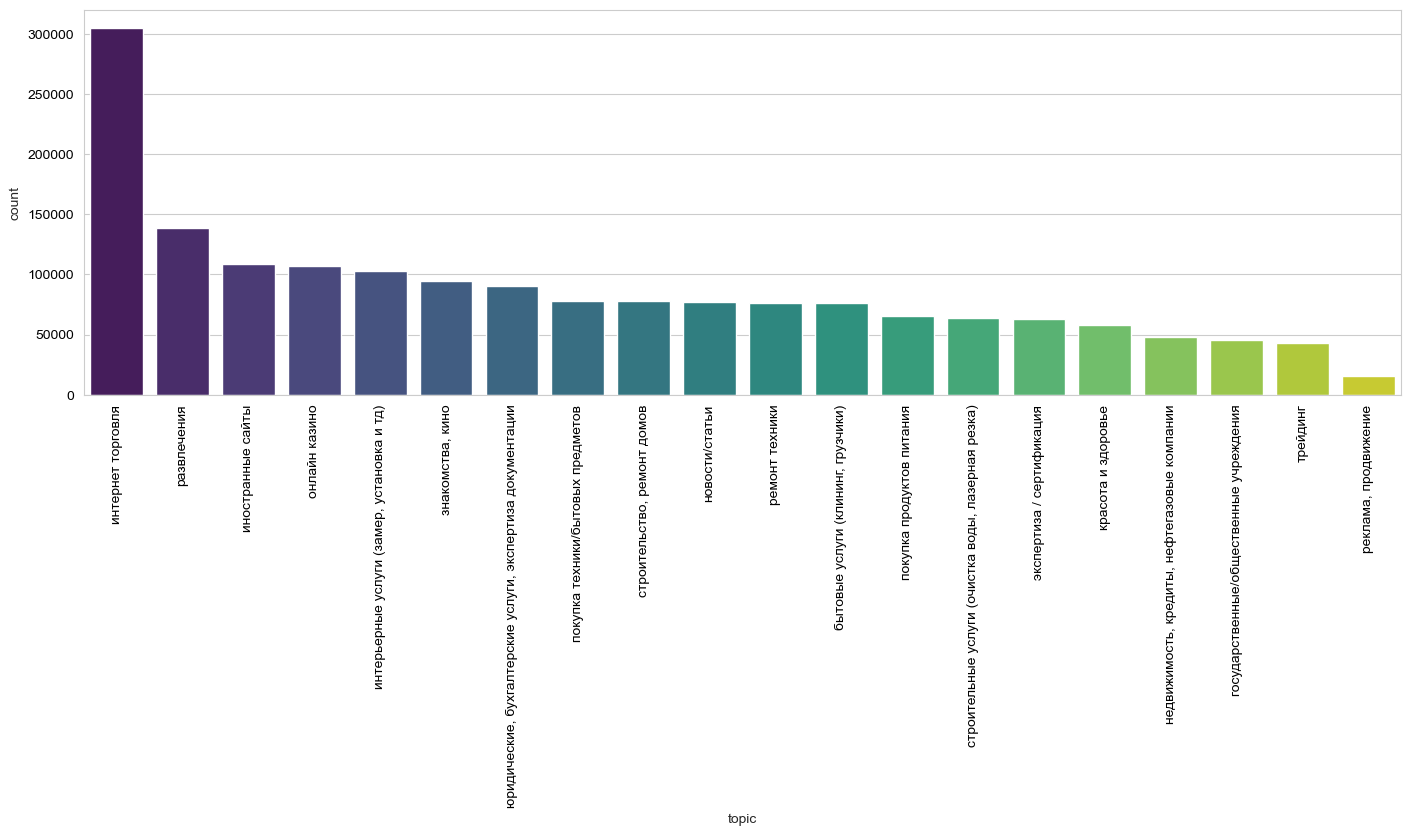

In [ ]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.countplot(x=df[df['topic'] != 'неинтерпретируемое']['topic'], palette='viridis', order=df[df['topic'] != 'неинтерпретируемое']['topic'].value_counts().index)
plt.xticks(rotation=90);

**Самые частые темы по годам**

In [ ]:
topic_counts = df.groupby(['creation_year', 'topic'])['name length'].count()
most_common_topics = topic_counts.groupby('creation_year').idxmax()
pd.DataFrame(most_common_topics.values.tolist(), columns=['topic', 'count'])

,topic,count
0,1996,неинтерпретируемое
1,1997,неинтерпретируемое
2,1998,неинтерпретируемое
3,1999,неинтерпретируемое
4,2000,неинтерпретируемое
5,2001,неинтерпретируемое
6,2002,неинтерпретируемое
7,2003,неинтерпретируемое
8,2004,неинтерпретируемое
9,2005,неинтерпретируемое


**Самые частые темы по годам (исключая неинтерпретируемые)**

In [ ]:
df = df[df.topic != 'неинтерпретируемое']
topic_counts = df.groupby(['creation_year', 'topic'])['name length'].count()
most_common_topics = topic_counts.groupby('creation_year').idxmax()
pd.DataFrame(most_common_topics.values.tolist(), columns=['topic', 'count'])

,topic,count
0,1996,экспертиза / сертификация
1,1997,экспертиза / сертификация
2,1998,интернет торговля
3,1999,интернет торговля
4,2000,интернет торговля
5,2001,интернет торговля
6,2002,интернет торговля
7,2003,интернет торговля
8,2004,интернет торговля
9,2005,интернет торговля


**Самая частая тема в каждом регистраторе**

In [ ]:
topic_counts = df.groupby(['registrator', 'topic'])['name length'].count()
most_common_topics = topic_counts.groupby('registrator').idxmax()
pd.DataFrame(most_common_topics.values.tolist(), columns=['topic', 'count'])

,topic,count
0,AAB,"недвижимость, кредиты, нефтегазовые компании"
1,ACTIVE,онлайн казино
2,ARDIS,интернет торговля
3,ATEX,интернет торговля
4,AXELNAME,интернет торговля
5,BEELINE,интернет торговля
6,BEGET,интернет торговля
7,CAPNAMES,"строительство, ремонт домов"
8,CC,"недвижимость, кредиты, нефтегазовые компании"
9,CENTRALREG,интернет торговля


**Распределение сайтов с темами "знакомста и кино", "онлайн казино" и "интернет-торговля" по годам**

<Axes: >

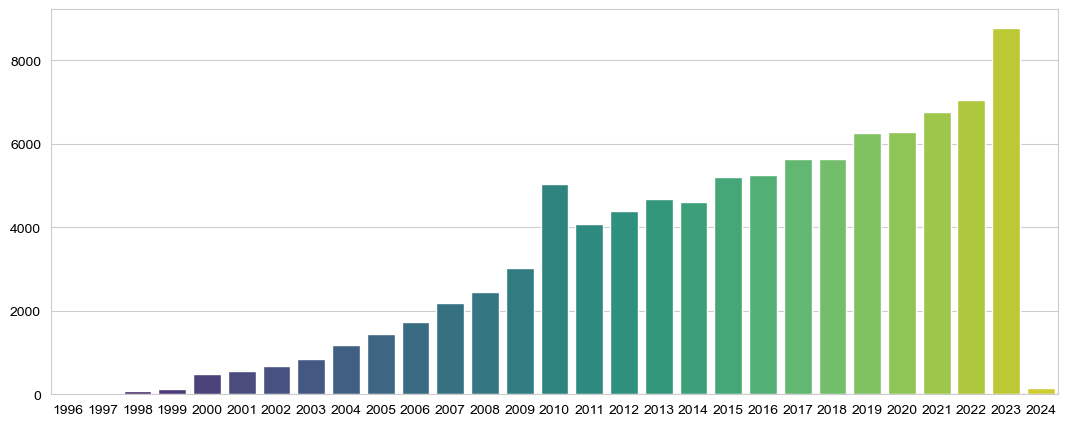

In [ ]:
entertainment_df = df[df['topic'] == 'знакомства, кино']
entertainment_counts = entertainment_df.groupby('creation_year')['topic'].count()
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(x=entertainment_counts.index.values, y=entertainment_counts.values, palette='viridis')

<Axes: >

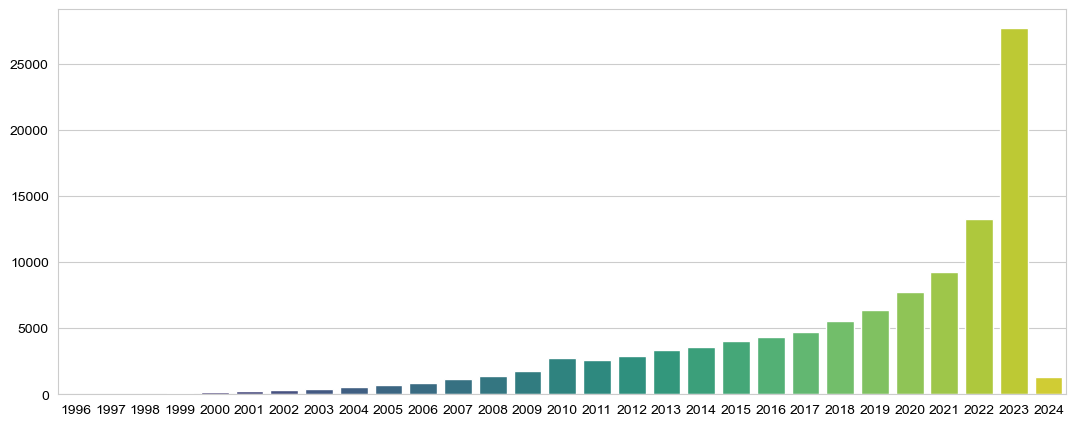

In [ ]:
entertainment_df = df[df['topic'] == 'онлайн казино']
entertainment_counts = entertainment_df.groupby('creation_year')['topic'].count()
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(x=entertainment_counts.index.values, y=entertainment_counts.values, palette='viridis')

<Axes: >

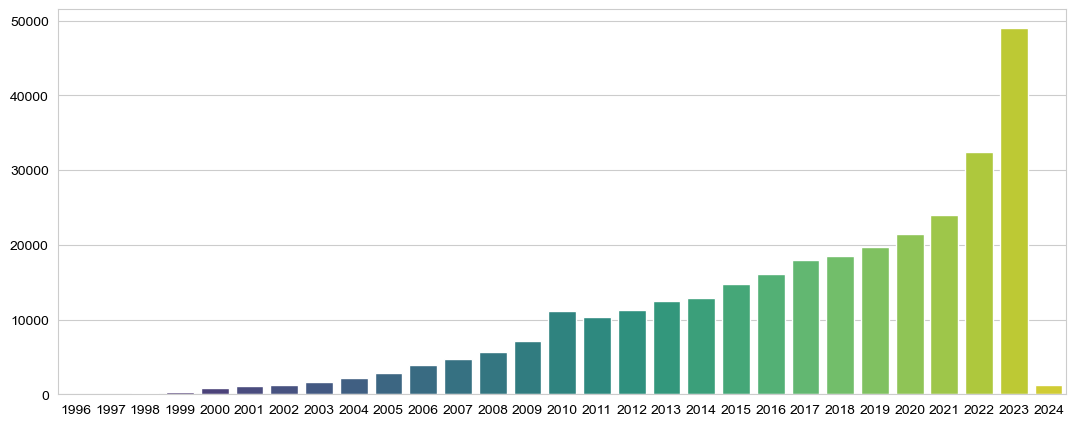

In [ ]:
entertainment_df = df[df['topic'] == 'интернет торговля']
entertainment_counts = entertainment_df.groupby('creation_year')['topic'].count()
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(x=entertainment_counts.index.values, y=entertainment_counts.values, palette='viridis')

## Анализ прочих признаков

**Соотношение делегированных и не делегированных доменов**

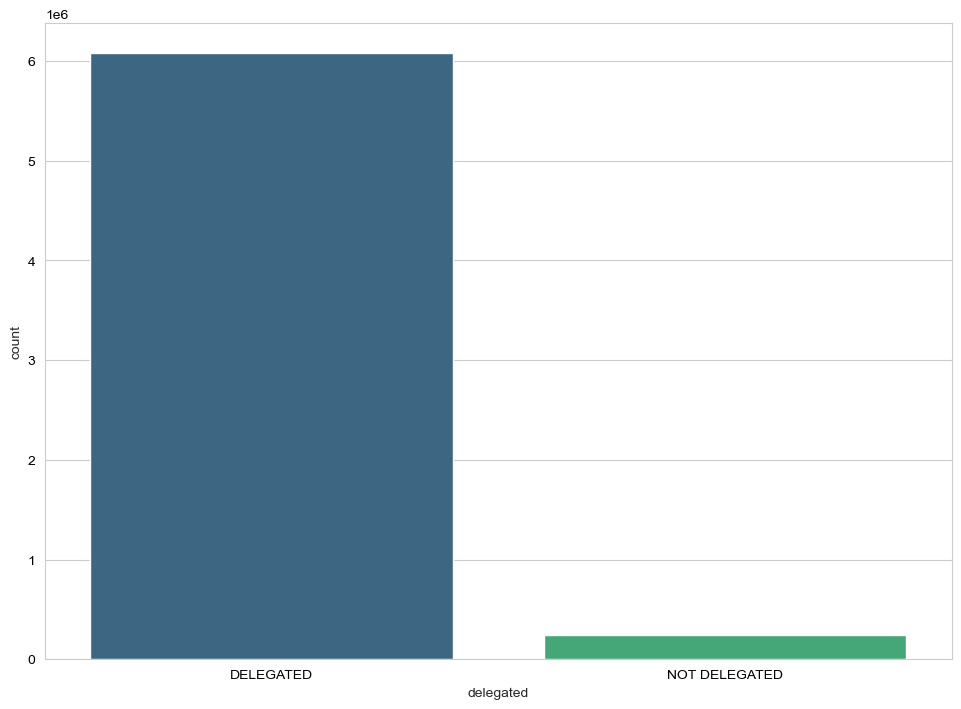

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x=domains['delegated'], palette='viridis');

**Распределение доменов по зонам**

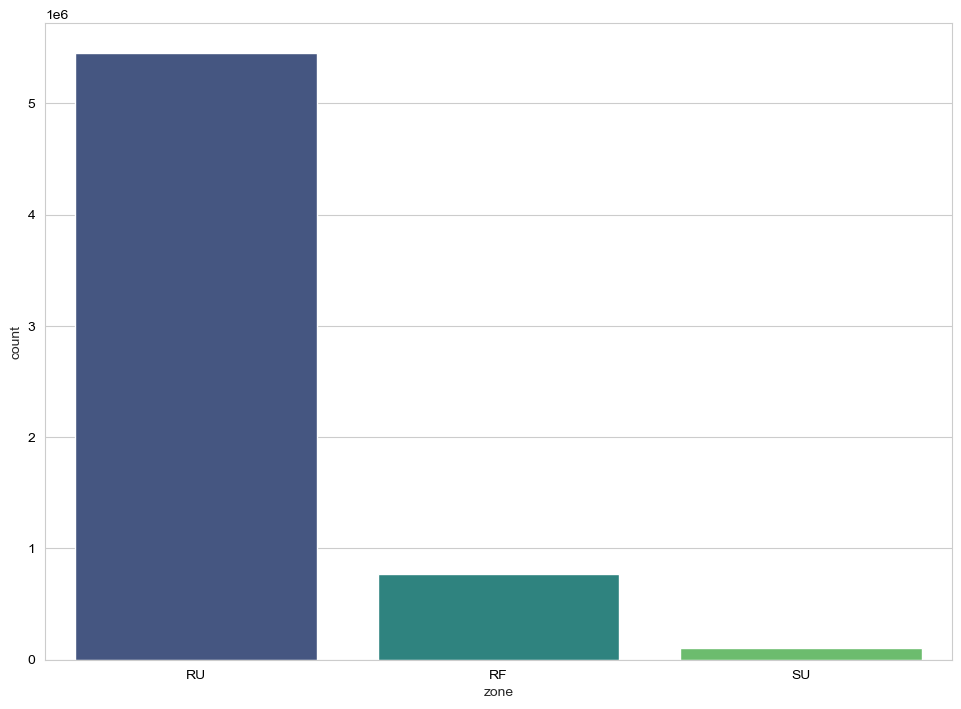

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x=domains['zone'], palette='viridis');

**Распределение доменов по топ-15 регистраторам**

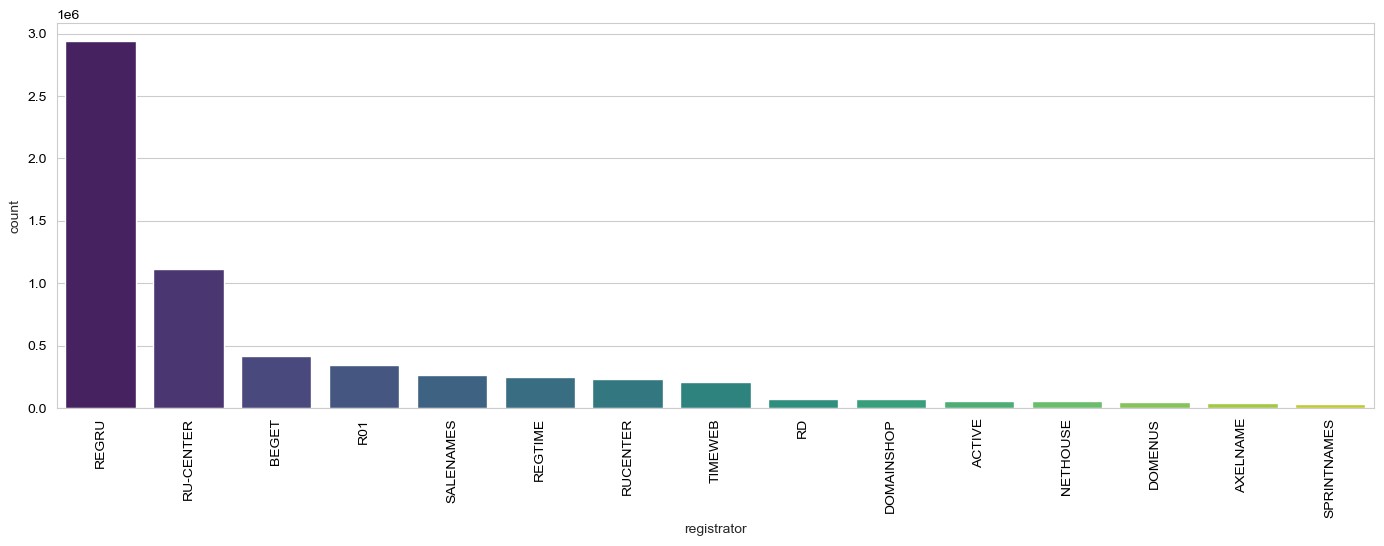

In [ ]:
dd = df[df['registrator'].isin(df['registrator'].value_counts()[:15].values)]
sns.countplot(x=dd['registrator'], palette='viridis', order=dd['registrator'].value_counts().index)
plt.xticks(rotation=90);

**Распределение доменов по году создания**

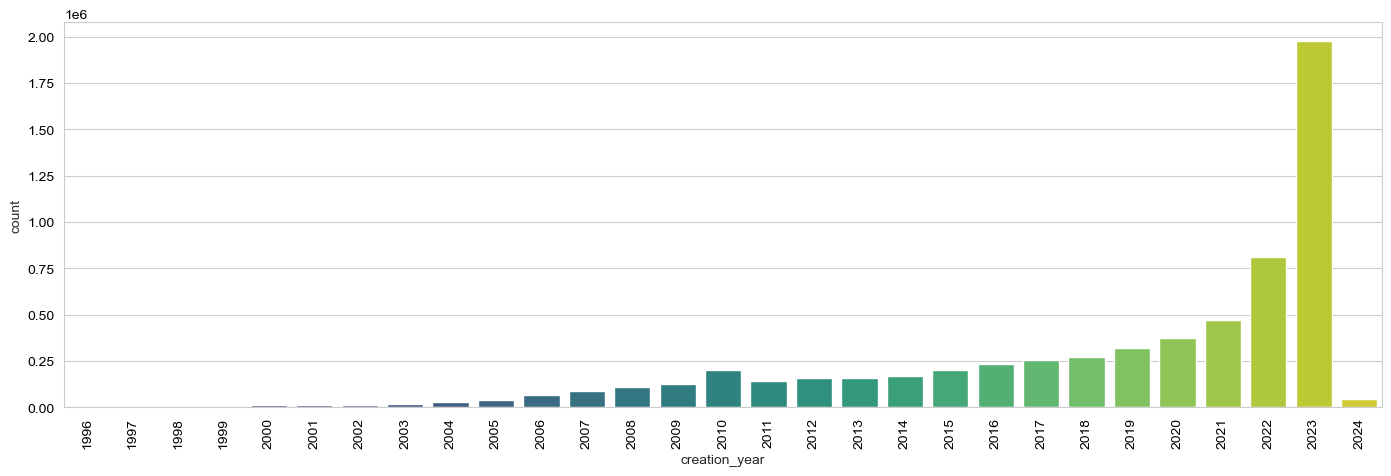

In [ ]:
sns.countplot(x=domains['creation_year'].sort_values(), palette='viridis')
plt.xticks(rotation=90);

**Распределение доменов по году , до которого была оплата**

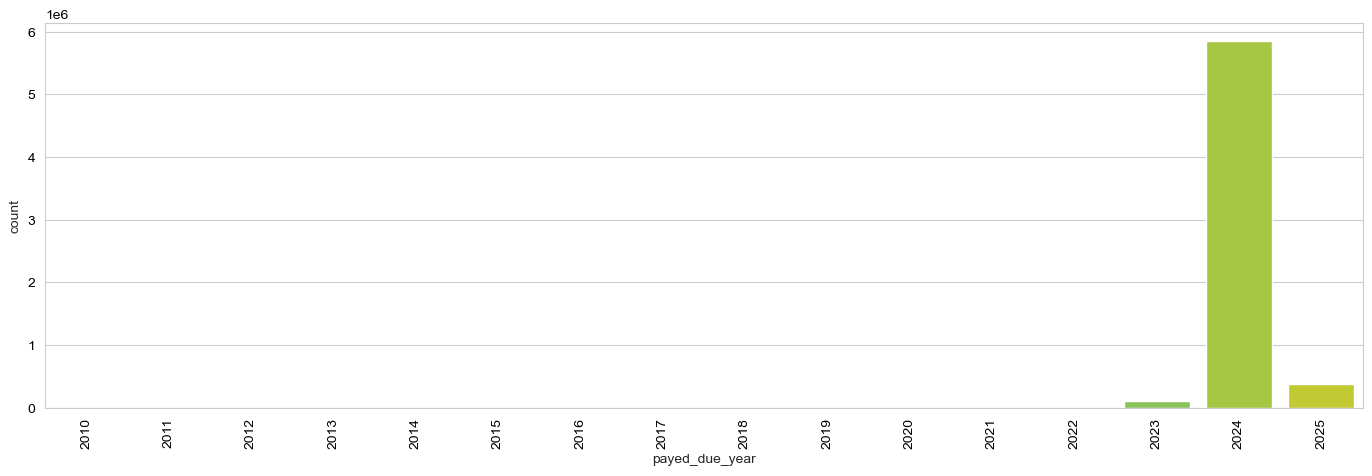

In [ ]:
sns.countplot(x=domains['payed_due_year'].sort_values(), palette='viridis', orient='v')
plt.xticks(rotation=90);

**Распрдееление возраста доменов в зависимости от зоны и делегированности**

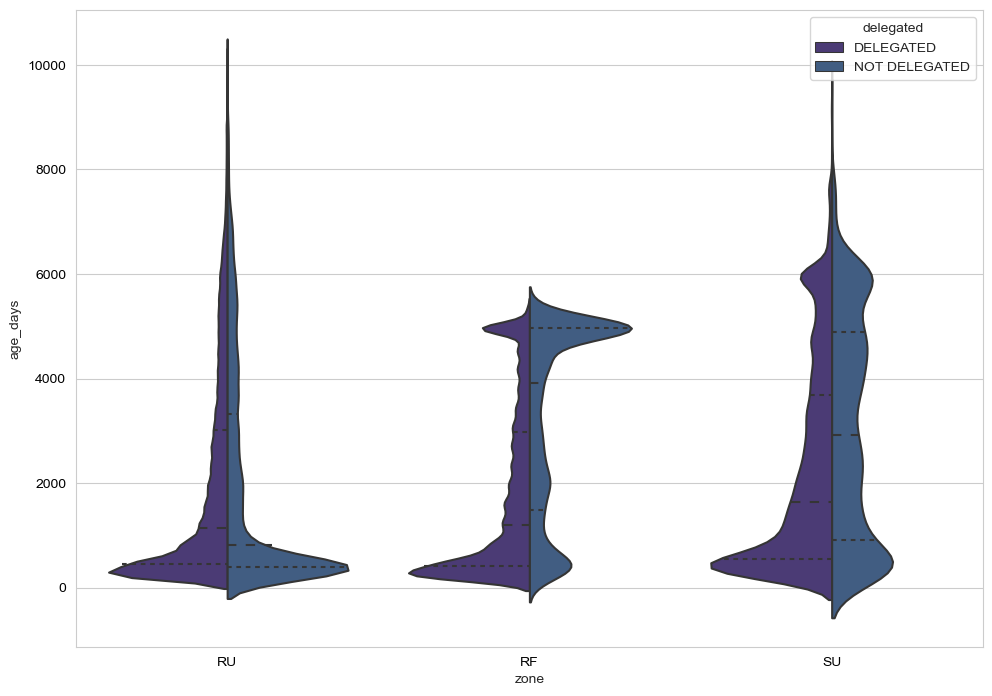

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, y=domains['age_days'], x=domains['zone'], hue=domains['delegated'], split=True, inner="quart");

**Распрдееление длины доменного имени в зависимости от зоны и делегированности**

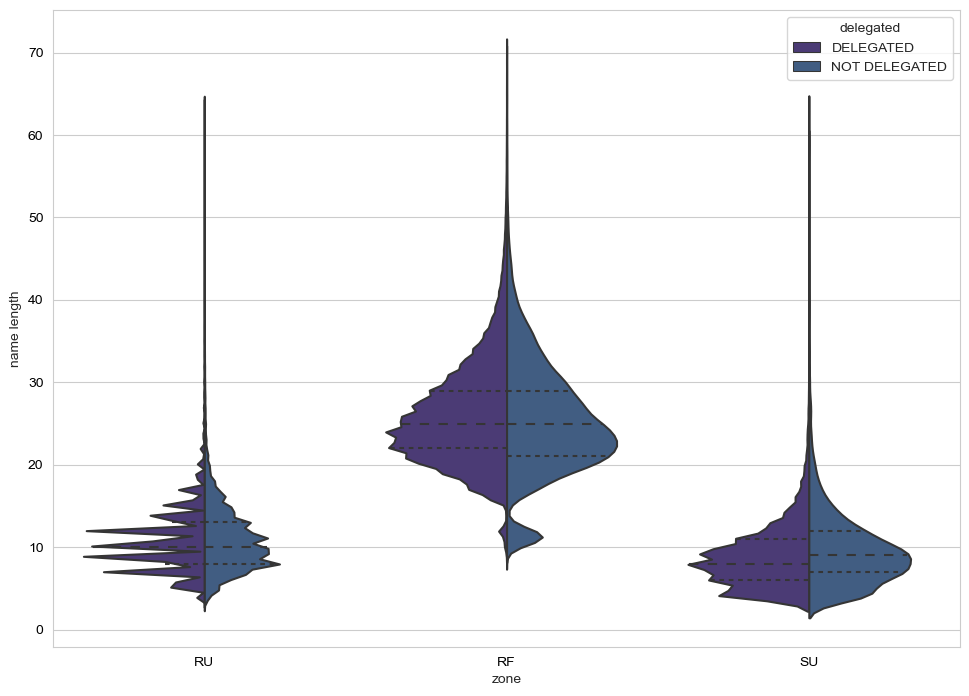

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, y=domains['name length'], x=domains['zone'], hue=domains['delegated'], split=True, inner="quart");

**Средняя длина доменного имени в зависимости от года создания**

c:\Users\Анна\.conda\envs\ml-2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Анна\.conda\envs\ml-2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='creation_year', ylabel='name length'>

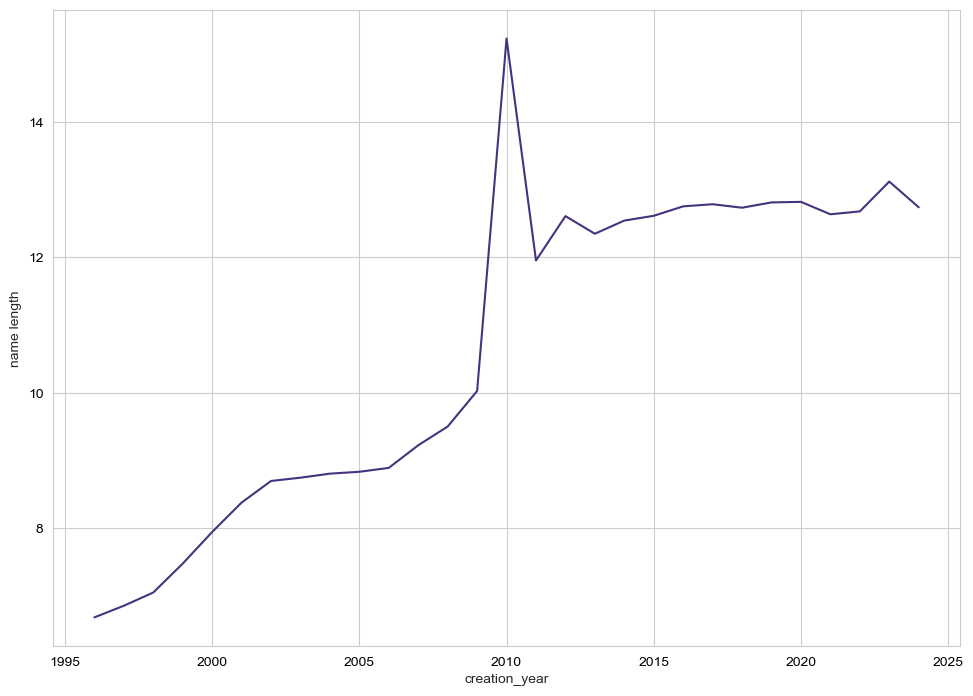

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(domains.select_dtypes(include='number').groupby('creation_year').mean()['name length'])

**Доля интернет торговли в созданных сайтах по годам**

Text(0, 0.5, 'Share, %')

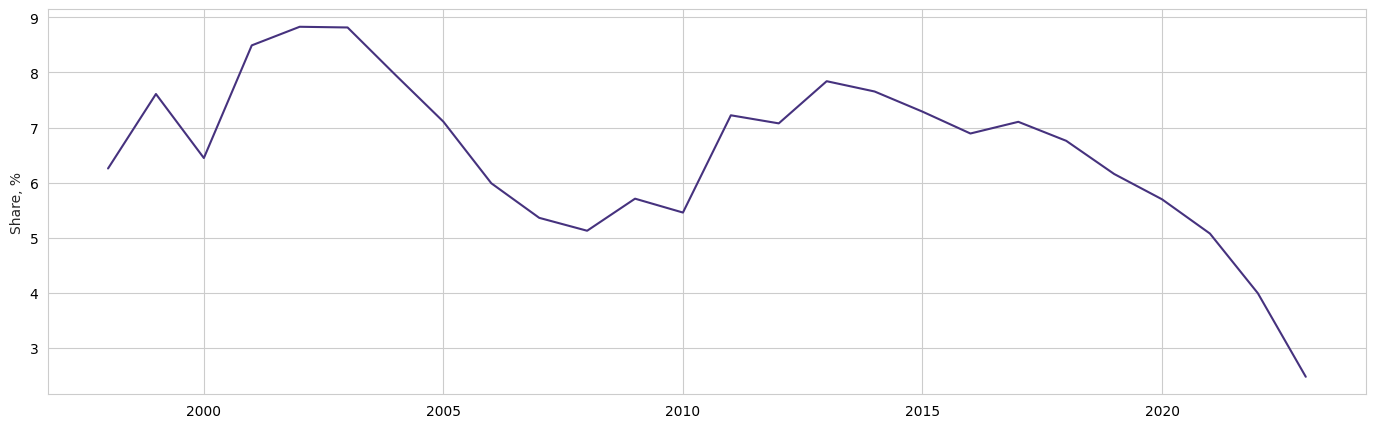

In [6]:
topic_counts = df.groupby(['creation_year', 'topic'])['name'].count().reset_index(name='count')
top_topics_by_year = topic_counts.groupby('creation_year').apply(lambda x: x.nlargest(2, 'count')).reset_index(drop=True)
total_sites_by_year = topic_counts.groupby('creation_year')['count'].sum()
top_topics_by_year['percentage'] = top_topics_by_year.apply(lambda row: row['count'] / total_sites_by_year[row['creation_year']] * 100, axis=1)
top_topics_by_year[top_topics_by_year['topic'] == 'интернет торговля']
plt.plot(top_topics_by_year[top_topics_by_year['topic'] == 'интернет торговля']['creation_year'], top_topics_by_year[top_topics_by_year['topic'] == 'интернет торговля']['percentage'])
plt.ylabel('Share, %')